# DS3000 Project
Trisha Nelson, Amulya Jayam, Shubham Yadav, Aashu Kedia​

In [1]:
# importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import math
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV,train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# EDA

In [2]:
df = pd.read_csv('cancer patient data sets.csv')

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [5]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [7]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [8]:
# dropping unecessary categorical columns
df.drop(columns=['Patient Id','Level'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

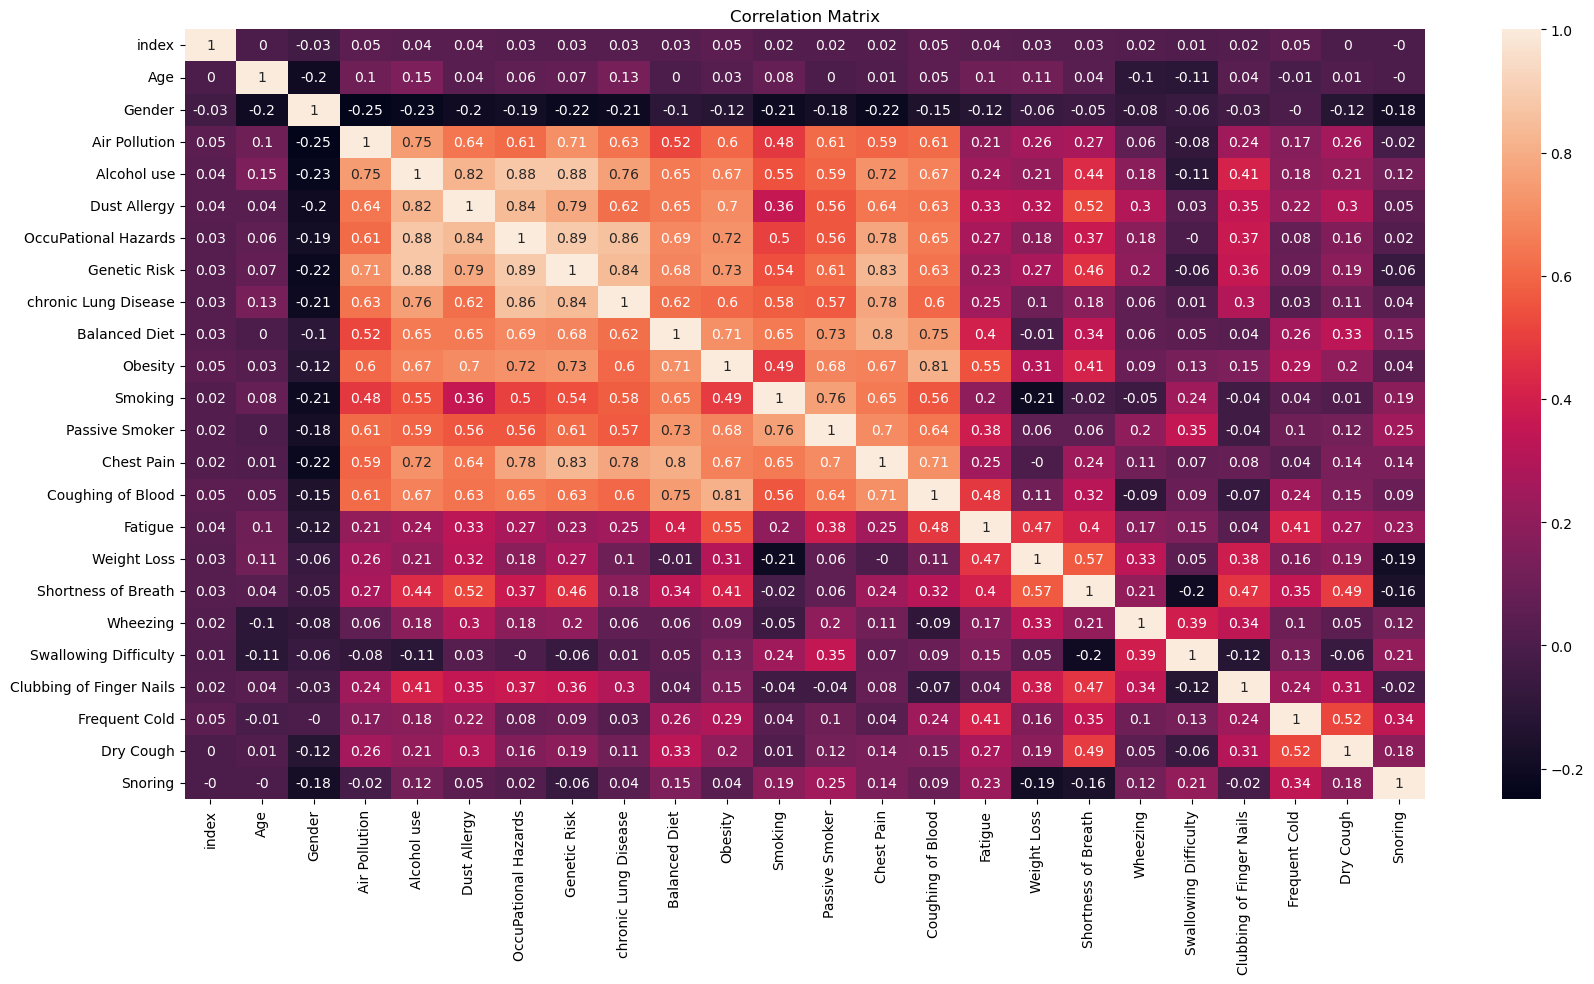

In [25]:
# showing correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
matrix = sns.heatmap(round(corr,2), annot = True,)
plt.title("Correlation Matrix")

The heatmap abpve demonstrates the correlation between different variables in our dataset. The map is color coded, where the stronger correlations are shown in lighter colors. The strongest correlations to our target feature (chronic lung disease) present are between the following variables : Air Pollution, Alcohol Use, Dust Allergy, Occupational Hazards, Genetic Risk, Balanced Diet, Obesity, Smoking, Passive Smoker,Chest Pain, and Coughing of Blood. These variables are the ones we will utilize as target variables in our models.

# Algorithm 1: Random Forest Classifier

In [10]:
# split into X and y sets
X = df[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk', 'Balanced Diet', 'Obesity', 'Smoking','Passive Smoker','Chest Pain', 'Coughing of Blood']]
y = df['chronic Lung Disease']

# partition data, ensure reproducilibility
seed = random.seed()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = seed, stratify= y)

# fitting the model
dt = DecisionTreeClassifier(max_depth = 3, criterion='entropy', random_state=7)
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

In [11]:
print('The following numbers are predictions of lung cancer severity of future patients:', y_pred)

The following numbers are predictions of lung cancer severity of future patients: [7 2 6 5 6 2 3 4 4 2 2 3 3 6 6 6 4 2 6 3 5 6 6 3 2 7 3 3 6 2 4 6 3 6 6 6 6
 3 4 2 3 6 6 6 3 6 2 2 6 6 6 5 4 7 6 5 6 3 6 2 2 3 6 3 6 2 6 3 2 6 2 6 2 3
 5 6 6 3 6 3 6 6 6 6 5 6 6 2 3 6 2 4 6 2 3 2 2 6 6 2 6 5 2 2 6 4 4 4 3 6 3
 2 3 2 6 6 6 2 7 6 3 3 3 7 2 7 6 6 6 3 7 7 3 2 6 6 5 6 3 6 2 6 3 3 5 3 5 7
 2 3 2 3 2 2 4 3 3 6 6 3 4 4 4 3 3 2 3 2 3 2 3 2 6 6 4 6 3 2 3 7 7 2 7 4 3
 6 6 2 6 3 6 3 3 3 2 2 2 2 6 5]


After fitting the model, we can see examples of the predictions the classifier is making. Each prediction is given as a number on a scale from 1-7, 1 being the lowest severity of lung cancer and 7 being the highest severity.

In [12]:
# hyperparameter tuning
param_dist = {'criterion': ['gini','entropy'],
              'max_depth': [5,10,20]}

dt = DecisionTreeClassifier(max_depth = 3, criterion='entropy', random_state=7)

# finding best parameter
rand_search = RandomizedSearchCV(dt, param_distributions = param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)

best = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'criterion': 'gini'}


Using a Grid Search CV, we have chosen to tune hyperparameters 'criterion' and 'max_depth' as both of these hyperparameters apply to the Decision Tree Classifier. Using this search we found the best hyperparamters for our model and applied those below to evaluate the best model using accuracy, precision, and recall.

In [13]:
# displaying accuracy of best model
dt = DecisionTreeClassifier(max_depth = 10, criterion='entropy', random_state=7)
dt.fit(X_train, y_train)
accuracy = round(dt.score(X_test, y_test),2)
print('The accuracy of this model is:', accuracy)

The accuracy of this model is: 1.0


In [14]:
# evaluating results using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.76      0.97      0.85        35
           3       0.41      0.71      0.52        28
           4       0.88      0.50      0.64        28
           5       1.00      0.69      0.81        16
           6       0.87      0.94      0.90        62
           7       1.00      0.57      0.73        21

    accuracy                           0.74       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.77      0.74      0.73       200



SOMEONE ELSE DESCRIBE CLASSIFICATION REPORT

# Algorithm 2: K-Nearest Neighbors

In [15]:
# partition data
X = df[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk', 'Balanced Diet', 'Obesity', 'Smoking','Passive Smoker','Chest Pain', 'Coughing of Blood']]
y = df['chronic Lung Disease']

random_seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=random_seed)


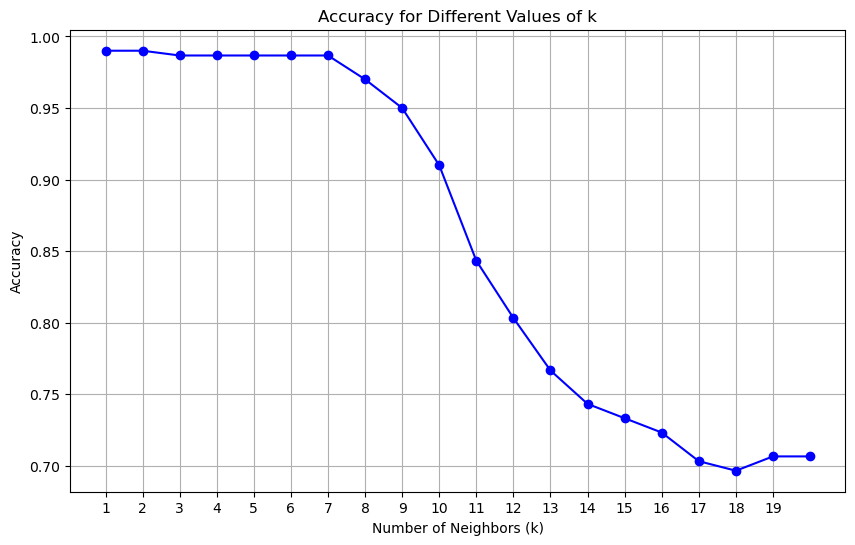

Best value of k: 1


In [16]:
# fidning the best values of k
k_values = list(range(1, 21))   
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

    
# creating plot to show best value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20, 1))  
plt.grid(True)
plt.show()
best_k = k_values[np.argmax(accuracies)]
print(f"Best value of k: {best_k}")

In [17]:
# fitting model, making predictions
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# displaying accuracy
print('The accuracy of this model is:', accuracy_score(y_test, y_pred))

The accuracy of this model is: 0.99


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.98      1.00      0.99        51
           3       1.00      0.97      0.99        37
           4       0.98      1.00      0.99        44
           5       1.00      0.96      0.98        24
           6       1.00      0.99      1.00       103
           7       0.96      1.00      0.98        25

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



^^Someone else describe classification report

# Algorithm 3: SVM

In [19]:
# setting X and y sets
X = df[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk', 'Balanced Diet', 'Obesity', 'Smoking','Passive Smoker','Chest Pain', 'Coughing of Blood']]
y = df['chronic Lung Disease']

# partition data, ensure reproducilibility
seed = random.seed()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = seed, stratify= y)

Using the same partitions and target set as we have for this whole project, we can now move on to normalization/encoding of the data. Most of the data has already been provided has already been encoded, so no need to further encode it; the only column that must be normalized is the Age column, given that it is numerical.

In [20]:
# normalize numeric data
scaler = StandardScaler()
scaler.fit(X_train[['Age']])

X_train[['Age']] = scaler.transform(X_train[['Age']])
X_test[['Age']] = scaler.transform(X_test[['Age']])

Finally, before evaluation of the model, we will use a Grid Search CV to tune the hyperparameters C and gamma in order to find the hyperparamter values that will return the most accurate model.

In [21]:
# use gridsearch to tune 2 hyperparameters
params = {'C': np.arange(5, 10),'gamma': np.arange(0.001, 0.01)}
svm = SVC()

In [22]:
# start cross validation
svm_grid = GridSearchCV(estimator = svm, param_grid = params, cv=5, return_train_score = True)
svm_grid.fit(X_train, y_train)

print("The best parameters are", svm_grid.best_params_) 
print("The best score is", svm_grid.best_score_)  

The best parameters are {'C': 9, 'gamma': 0.001}
The best score is 0.82875


In [23]:
# evaluating the best model
svm = SVC(C = 9, gamma = 0.001)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('The predicted outcomes are: {}'.format(y_pred))
print('The accuracy of the model is: {}'.format(svm.score(X_test, y_test)))

The predicted outcomes are: [1 4 2 3 2 6 7 6 6 5 5 1 6 6 2 5 4 3 4 6 2 2 3 6 3 6 6 2 6 6 6 4 2 2 2 7 4
 3 4 6 3 2 5 6 7 4 6 6 4 6 5 6 6 3 1 2 6 5 3 3 3 4 1 2 6 6 6 6 4 4 5 5 4 2
 3 6 3 2 3 2 4 6 6 6 6 3 3 2 7 5 4 3 6 3 6 5 6 2 6 2 6 6 4 1 3 3 6 6 6 7 6
 6 3 5 6 6 6 2 7 4 3 5 3 1 5 4 3 4 2 4 6 4 6 6 2 1 6 6 6 1 4 5 6 6 4 3 4 2
 3 6 7 2 6 6 3 3 2 3 6 4 2 1 7 3 6 2 6 6 6 6 2 3 4 6 6 4 1 6 6 4 6 2 1 2 6
 6 5 6 7 3 4 6 6 4 4 1 2 6 3 6]
The accuracy of the model is: 0.84


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.67      0.80      0.73        10
           2       0.90      0.77      0.83        35
           3       0.78      0.89      0.83        28
           4       0.83      0.89      0.86        28
           5       0.93      0.88      0.90        16
           6       0.83      0.97      0.90        62
           7       1.00      0.43      0.60        21

    accuracy                           0.84       200
   macro avg       0.85      0.80      0.81       200
weighted avg       0.85      0.84      0.83       200



SOMEONE DO THE CLASSIFICATION REPORT ANALYSIS